In [5]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

r = requests.get("https://www.whitehouse.gov/briefing-room/speeches-remarks/2021/01/20/inaugural-address-by-president-joseph-r-biden-jr/")
soup = BeautifulSoup(r.content, 'html.parser')

In [6]:
paragraphs = soup.find_all("p")
paragraphs = [paragraph.text for paragraph in paragraphs]
speech = " ".join(paragraphs[3:211])

In [7]:
print(speech)

THE PRESIDENT: Chief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice President Pence, distinguished guests, and my fellow Americans. This is America’s day. This is democracy’s day. A day of history and hope. Of renewal and resolve. Through a crucible for the ages America has been tested anew and America has risen to the challenge. Today, we celebrate the triumph not of a candidate, but of a cause, the cause of democracy. The will of the people has been heard and the will of the people has been heeded. We have learned again that democracy is precious. Democracy is fragile. And at this hour, my friends, democracy has prevailed. So now, on this hallowed ground where just days ago violence sought to shake this Capitol’s very foundation, we come together as one nation, under God, indivisible, to carry out the peaceful transfer of power as we have for more than two centuries. We look ahead in our uniquely American way – restless, bold, optimisti

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform([speech])
print(pd.Series(counts.toarray()[0], index = vectorizer.get_feature_names_out()).sort_values(ascending=False))

the           102
and            96
we             91
of             76
to             65
             ... 
guides          1
guests          1
guardrails      1
guarantee       1
your            1
Length: 727, dtype: int64


In [10]:
import nltk
vectorizer = CountVectorizer(stop_words='english')
counts = vectorizer.fit_transform([speech])
print(pd.Series(counts.toarray()[0], index = vectorizer.get_feature_names_out()).sort_values(ascending=False))

america       18
nation        14
democracy     11
today          9
people         9
              ..
guides         1
guests         1
guardrails     1
guarantee      1
yesterday      1
Length: 582, dtype: int64


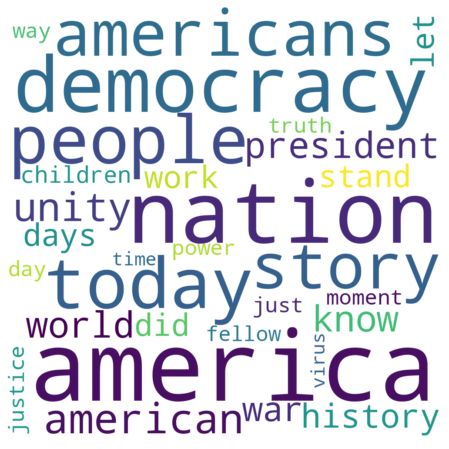

In [12]:
from wordcloud import WordCloud 
import matplotlib.pyplot as pltcloud=pd.Series(counts.toarray()[0], index = vectorizer.get_feature_names_out()).sort_values(ascending=False).to_dict()

wordcloud = WordCloud(width = 1000, height = 1000, min_word_length =3, max_words = 30, background_color='white')
wordcloud.generate_from_frequencies(cloud)

#plot
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()